### In the previous part I have made analysis for spotify's top 50 songs.

### In this part I have created machine learning 

# Spotify : Top 50 Songs ML (Part-2)

## By - Deepak Kaura

In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Loading dataset and priniting top 5 rows

top50 = pd.read_csv('top50.csv', encoding='cp1252')
top50.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [58]:
# Checking the statistics of dataset for numerical variables

top50.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [59]:
# Checking the statistics of dataset for categorical variables

top50.describe(include='O')

,Track.Name,Artist.Name,Genre
count,50,50,50
unique,50,38,21
top,Truth Hurts,Ed Sheeran,dance pop
freq,1,4,8


In [60]:
# Droping the Unnamed fiels as it adds no value to our analysis

top50=top50.drop('Unnamed: 0', axis=1)

In [61]:
top50.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [62]:
#Checking If Null Values Exist

top50.isna().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [63]:
#DataAnalysis

#Checking Most Popular Genre

top50['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton flow      2
brostep             2
reggaeton           2
electropop          2
country rap         2
panamanian pop      2
dfw rap             2
canadian pop        2
trap music          1
big room            1
boy band            1
australian pop      1
pop house           1
r&b en espanol      1
atl hip hop         1
escape room         1
Name: Genre, dtype: int64

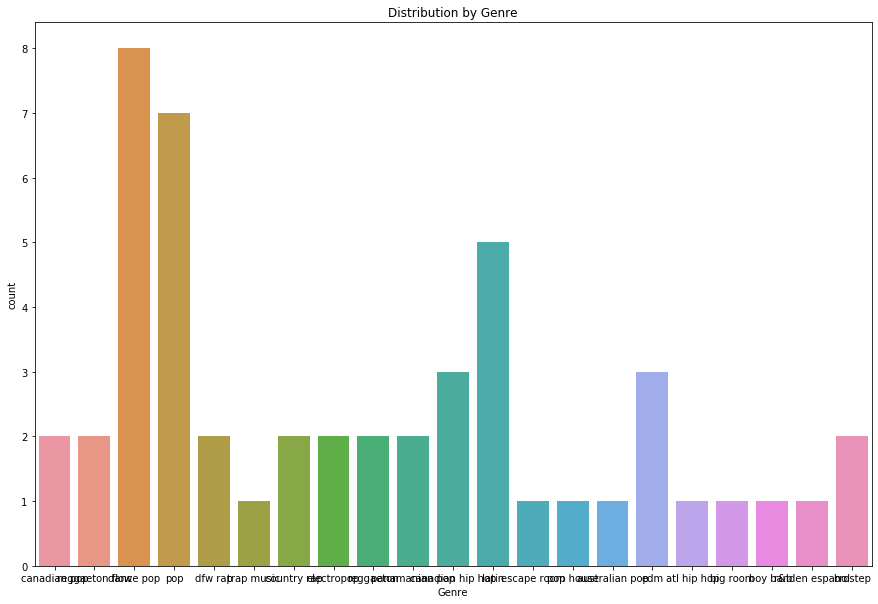

In [64]:
# Checking Histogram of Genre 

plt.figure(figsize=(15,10))
sns.countplot(top50['Genre'])
plt.title('Distribution by Genre')
plt.show()

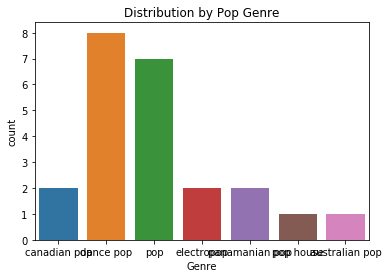

In [65]:
# Combine related Genres as many variations of each genre are present in data set

# Selecting rows where Genre contains the word "pop"

sns.countplot(top50[top50['Genre'].str.contains('pop')]['Genre'])
plt.title('Distribution by Pop Genre')
plt.show()

In [66]:
top50.loc[top50['Genre'].str.contains('pop', case=False), 'Genre'] = 'Pop'
top50

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,Pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,Pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,Pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,Pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,Pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,Pop,135,43,70,-11,10,56,194,33,38,95


In [67]:
top50['Genre'].value_counts()

Pop                 23
latin                5
canadian hip hop     3
edm                  3
brostep              2
dfw rap              2
reggaeton            2
reggaeton flow       2
country rap          2
big room             1
trap music           1
escape room          1
boy band             1
r&b en espanol       1
atl hip hop          1
Name: Genre, dtype: int64

In [68]:
top50.loc[top50['Genre'].str.contains('hip', case=False), 'Genre'] = 'Hip Hop'
top50

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,Pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,Pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,Pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,Pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,Pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,Pop,135,43,70,-11,10,56,194,33,38,95


In [69]:
top50.loc[top50['Genre'].str.contains('rap', case=False), 'Genre'] = 'Rap'

In [70]:
top50.loc[top50['Genre'].str.contains('reggaeton', case=False), 'Genre'] = 'Reggaeton'

In [71]:
top50['Genre'].value_counts()

Pop               23
Rap                5
latin              5
Reggaeton          4
Hip Hop            4
edm                3
brostep            2
big room           1
escape room        1
r&b en espanol     1
boy band           1
Name: Genre, dtype: int64

In [72]:
top50.head(10)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,Pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,Reggaeton,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,Pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,Pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,Rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,Pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,Rap,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,Pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,Rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,Pop,135,43,70,-11,10,56,194,33,38,95


In [73]:
top50.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,Pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,Reggaeton,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,Pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,Pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,Rap,150,65,58,-4,11,18,175,45,7,94


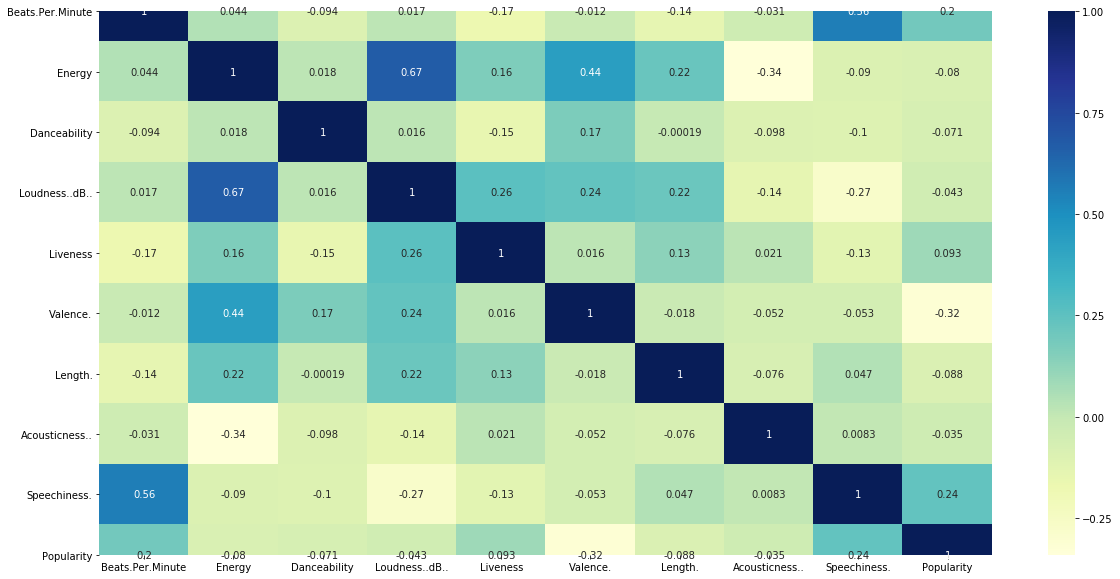

In [74]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(top50.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [75]:
top50.drop('Track.Name', axis=1, inplace=True)

In [76]:
top50.drop('Artist.Name', axis=1, inplace=True)

In [77]:
# importing library for label encoding the Genre Data. 

from sklearn.preprocessing import LabelEncoder
# creating object for label encoding. 

le = LabelEncoder()

In [78]:
# Encoding the Genre column. 

top50.Genre = le.fit_transform(top50.Genre)

In [79]:
top50.head(15)

,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,117,55,76,-6,8,75,191,4,3,79
1,3,105,81,79,-4,8,61,302,8,9,92
2,1,190,80,40,-4,16,70,186,12,46,85
3,1,93,65,64,-8,8,55,198,12,19,86
4,2,150,65,58,-4,11,18,175,45,7,94
5,1,102,68,80,-5,9,84,220,9,4,84
6,2,180,64,75,-6,7,23,131,2,29,92
7,1,111,68,48,-5,8,35,202,15,9,90
8,2,136,62,88,-6,11,64,157,5,10,87
9,1,135,43,70,-11,10,56,194,33,38,95


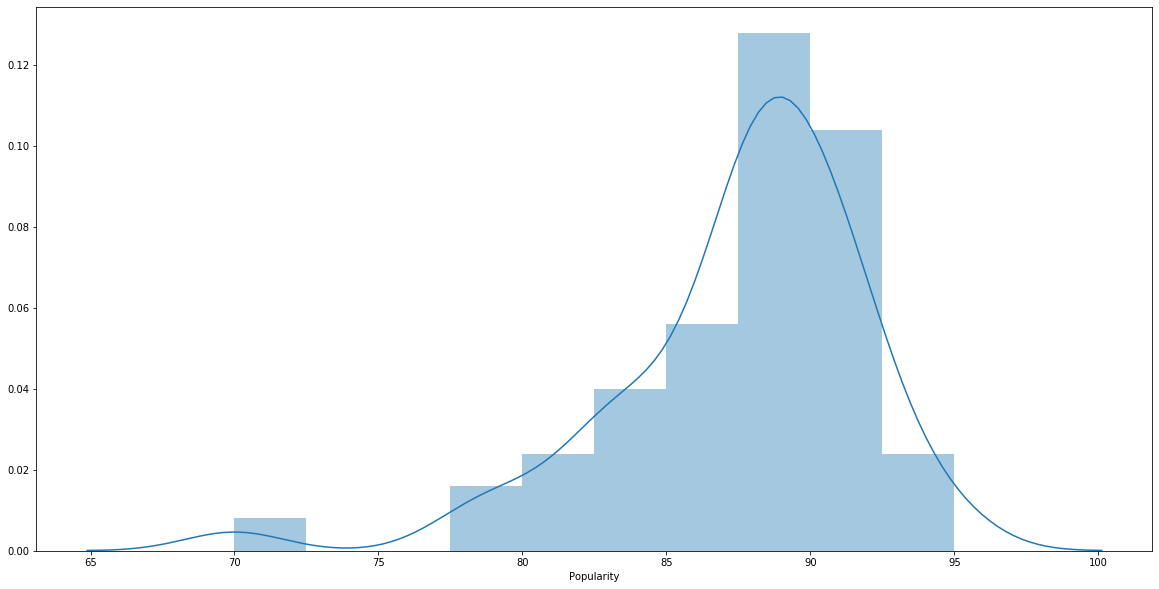

In [80]:
# Check the distribution of target variable. 

plt.figure(figsize=(20,10))
sns.distplot(top50.Popularity)
plt.show()

In [81]:
# Creating the Features and Targets datasets. 

X = top50[['Genre', 'Beats.Per.Minute', 'Energy', 'Danceability',
       'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..',
       'Speechiness.']]

y = top50.Popularity

In [82]:
# Importing library for Train Test split.

from sklearn.model_selection import train_test_split
# Creating the splits. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [83]:
# Importing library for standard scaling

from sklearn.preprocessing import StandardScaler
# Creating the scaler object
scaler = StandardScaler()

In [84]:
# Scaling the Training and Testing Data.

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Checking the dimensions of the training and testing sets. 
print("Training Feature data : ", X_train.shape)
print("Training Feature data : ", X_test.shape)
print("Training Feature data : ", y_train.shape)
print("Testing Target data : ", y_test.shape)

Training Feature data :  (35, 10)
Training Feature data :  (15, 10)
Training Feature data :  (35,)
Testing Target data :  (15,)


In [85]:
# Checking the training data. 

X_train

array([[-6.05199831e-01, -7.46815263e-01,  2.17810045e-01,
        -5.22691326e-01, -1.10574356e+00, -5.51318016e-01,
         2.25748918e-01,  7.01994272e-02, -5.59127190e-01,
         6.32572616e-01],
       [-6.05199831e-01, -6.78657417e-01, -4.61498512e-01,
         8.23634816e-01, -1.13409595e-01, -7.34219727e-01,
         8.26425865e-01,  9.87689615e-02,  1.35527569e+00,
        -4.47429412e-01],
       [-6.05199831e-01, -7.46815263e-01, -1.29176453e+00,
        -4.75173932e-02, -6.09576575e-01,  1.80288830e-01,
        -1.66869376e+00,  1.87008009e+00, -5.59127190e-01,
         2.72571940e-01],
       [-6.05199831e-01, -1.01944665e+00,  4.44246231e-01,
         5.06852194e-01, -1.13409595e-01, -6.42768871e-01,
         1.05745546e+00, -7.01177999e-01, -1.14408363e+00,
        -6.27429749e-01],
       [ 1.90791811e+00,  1.46831476e+00, -8.62614041e-03,
         1.10873918e-01,  1.37509134e+00, -1.85514593e-01,
        -4.21133947e-01, -6.44038931e-01, -6.12305048e-01,
        -8.

In [86]:
# Import the libraries .

from sklearn.linear_model import LinearRegression
# Creating the object
regressor = LinearRegression()

In [87]:
# Fit the model. 

regressor.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predicting the test results. 

y_pred = regressor.predict(X_test)
# Checking the predictions. 
y_pred

array([87.81476388, 86.27724257, 81.71062715, 85.44068748, 87.89542072,
       88.89264819, 91.32905614, 81.49403011, 85.26431889, 86.22775085,
       87.4131682 , 87.6777934 , 88.21680469, 84.50151202, 86.14564393])

In [89]:
# Checking the actuals

y_test

34    89
36    91
1     92
38    80
8     87
16    90
35    89
13    87
29    89
24    89
18    88
46    88
12    88
23    91
25    70
Name: Popularity, dtype: int64

In [90]:
# Creating dataframe of features and coefficients. 

output = {'Features': X.columns, 'Coefficient': regressor.coef_}
output_df = pd.DataFrame(output)
output_df.sort_values('Coefficient')

,Features,Coefficient
7,Length.,-1.751187
6,Valence.,-1.716046
4,Loudness..dB..,-0.202625
3,Danceability,0.020134
5,Liveness,0.147198
1,Beats.Per.Minute,0.333696
9,Speechiness.,0.402355
8,Acousticness..,0.584347
0,Genre,0.763219
2,Energy,0.773372


In [91]:
# Checking RMSE

# Import libraries. 
from sklearn.metrics import mean_squared_error

# Checking the RMSE
mean_squared_error(y_pred, y_test)

34.79984967503586

In [92]:
# Checking the intercept

regressor.intercept_

87.62857142857143

In [93]:
# Importing the RFE Library. 

from sklearn.feature_selection import RFE

In [94]:
# Running RFE with the output number of the variable equal to 5
# We select 5 as we have total 10 variables, hence 5 looks to be a good number,
# Considering we do not loose much information from the functional perspective as well .. !! 

rfe = RFE(regressor, 5) # running RFE
rfe = rfe.fit(X_train, y_train) # Fitting the training data

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [95]:
# Getting the columns with RFE

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Genre', True, 1),
 ('Beats.Per.Minute', False, 3),
 ('Energy', True, 1),
 ('Danceability', False, 6),
 ('Loudness..dB..', False, 4),
 ('Liveness', False, 5),
 ('Valence.', True, 1),
 ('Length.', True, 1),
 ('Acousticness..', False, 2),
 ('Speechiness.', True, 1)]

In [96]:
# Creating new set of features. 

X_new = X[['Genre', 'Energy', 'Valence.', 'Length.', 'Speechiness.']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [98]:
# Scaling the Training and Testing Data.

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Creating the object
regressor_rfe = LinearRegression()

In [99]:
# Fitting the model. 

regressor_rfe.fit(X_train, y_train)

LinearRegression()

In [100]:
# Getting the predictions.

y_pred_rfe = regressor_rfe.predict(X_test)
# Checking the RMSE
mean_squared_error(y_pred_rfe, y_test)

26.877062272331614

In [101]:
# Checking the intercept

regressor_rfe.intercept_

88.11428571428571

In [102]:
# Creating dataframe of features and coefficients.

output_rfe = {'Features': X_new.columns, 'Coefficient': regressor_rfe.coef_}
output_df_rfe = pd.DataFrame(output_rfe)
output_df_rfe

,Features,Coefficient
0,Genre,0.997244
1,Energy,0.504065
2,Valence.,-1.506149
3,Length.,-0.583470
4,Speechiness.,1.022895


In [103]:
# We will compare the differences as well, if possible. 

prediction_diff = y_pred_rfe - y_test
check_predictions = {'Predictions': y_pred_rfe, 'Actuals': y_test, 'Difference': prediction_diff}
check_predictions_df = pd.DataFrame(check_predictions)
check_predictions_df.sort_values('Difference')

,Predictions,Actuals,Difference
17,84.607761,91,-6.392239
4,90.005064,94,-3.994936
37,85.380209,87,-1.619791
12,86.640063,88,-1.359937
13,85.747981,87,-1.252019
19,90.588328,91,-0.411672
32,88.911968,89,-0.088032
8,87.325277,87,0.325277
48,88.625387,88,0.625387
45,89.132338,88,1.132338


Text(0, 0.5, 'Predicted')

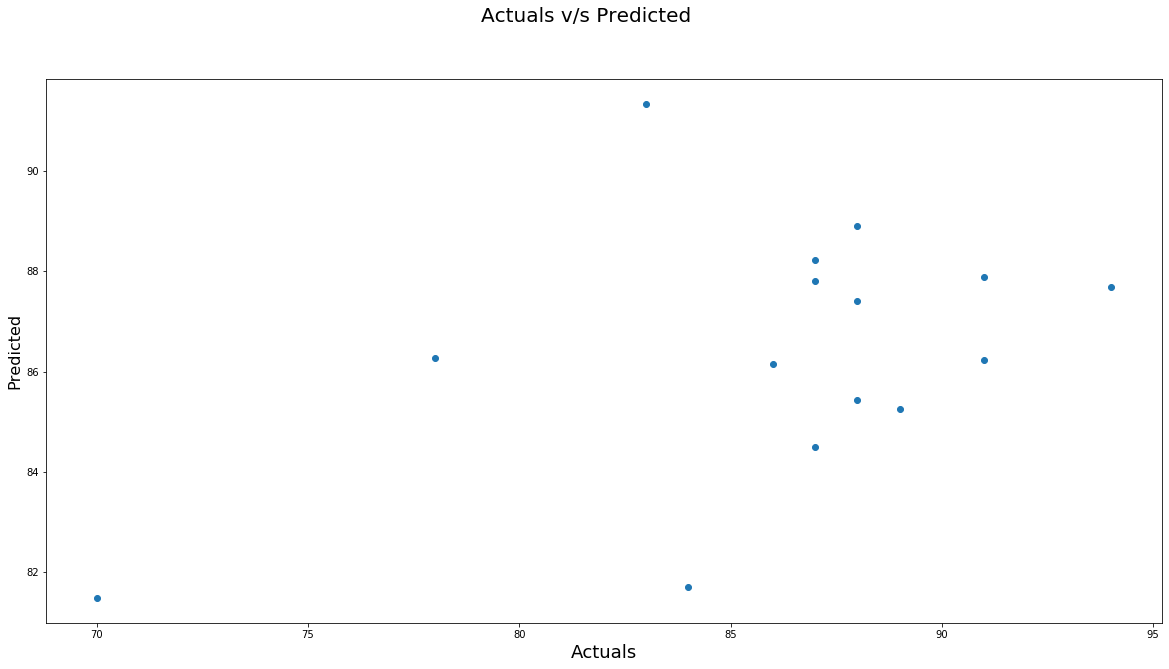

In [104]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred)
fig.suptitle('Actuals v/s Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Actuals', fontsize=18)                          # X-label
plt.ylabel('Predicted', fontsize=16)  